In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from yellowbrick.regressor import PredictionError
import smogn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor


In [2]:
pip install smogn lightgbm

Note: you may need to restart the kernel to use updated packages.


Import processed_data after the EDA process in Exploratory Data Analysis file.

In [3]:
df = pd.read_csv("processed_data.csv",sep=",",index_col=0)

In [4]:
df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publisher_average_rating,author_average_rating,number_occurrence,author_average_page,author_book_count,language_average_rating,publication_year,rate_occurrence,review_weight,rating_weight_,rate_per_pages
0,4.57,652,2095690,27591,4.06,4.55,2,902.00,6,3.93,2006.00,9.14,126090.87,9577303.30,2979.64
1,4.49,870,2153167,29221,4.06,4.55,1,902.00,6,3.93,2004.00,4.49,131202.29,9667719.83,3906.30
2,4.42,352,6333,244,3.98,4.51,2,728.55,11,3.93,2003.00,8.84,1078.48,27991.86,1555.84
3,4.56,435,2339585,36325,4.06,4.55,2,902.00,6,3.93,2004.00,9.12,165642.00,10668507.60,1983.60
4,4.78,2690,41428,164,3.98,4.55,1,902.00,6,3.93,2004.00,4.78,783.92,198025.84,12858.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 0 to 11126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   average_rating            11127 non-null  float64
 1   num_pages                 11127 non-null  int64  
 2   ratings_count             11127 non-null  int64  
 3   text_reviews_count        11127 non-null  int64  
 4   publisher_average_rating  11127 non-null  float64
 5   author_average_rating     11127 non-null  float64
 6   number_occurrence         11127 non-null  int64  
 7   author_average_page       11127 non-null  float64
 8   author_book_count         11127 non-null  int64  
 9   language_average_rating   11127 non-null  float64
 10  publication_year          11127 non-null  float64
 11  rate_occurrence           11127 non-null  float64
 12  review_weight             11127 non-null  float64
 13  rating_weight_            11127 non-null  float64
 14  rate_per_pa

In [6]:
df.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publisher_average_rating,author_average_rating,number_occurrence,author_average_page,author_book_count,language_average_rating,publication_year,rate_occurrence,review_weight,rating_weight_,rate_per_pages
0,4.57,652,2095690,27591,4.06,4.55,2,902.00,6,3.93,2006.00,9.14,126090.87,9577303.30,2979.64
1,4.49,870,2153167,29221,4.06,4.55,1,902.00,6,3.93,2004.00,4.49,131202.29,9667719.83,3906.30
2,4.42,352,6333,244,3.98,4.51,2,728.55,11,3.93,2003.00,8.84,1078.48,27991.86,1555.84
3,4.56,435,2339585,36325,4.06,4.55,2,902.00,6,3.93,2004.00,9.12,165642.00,10668507.60,1983.60
4,4.78,2690,41428,164,3.98,4.55,1,902.00,6,3.93,2004.00,4.78,783.92,198025.84,12858.20


We will explore the relationships between variables

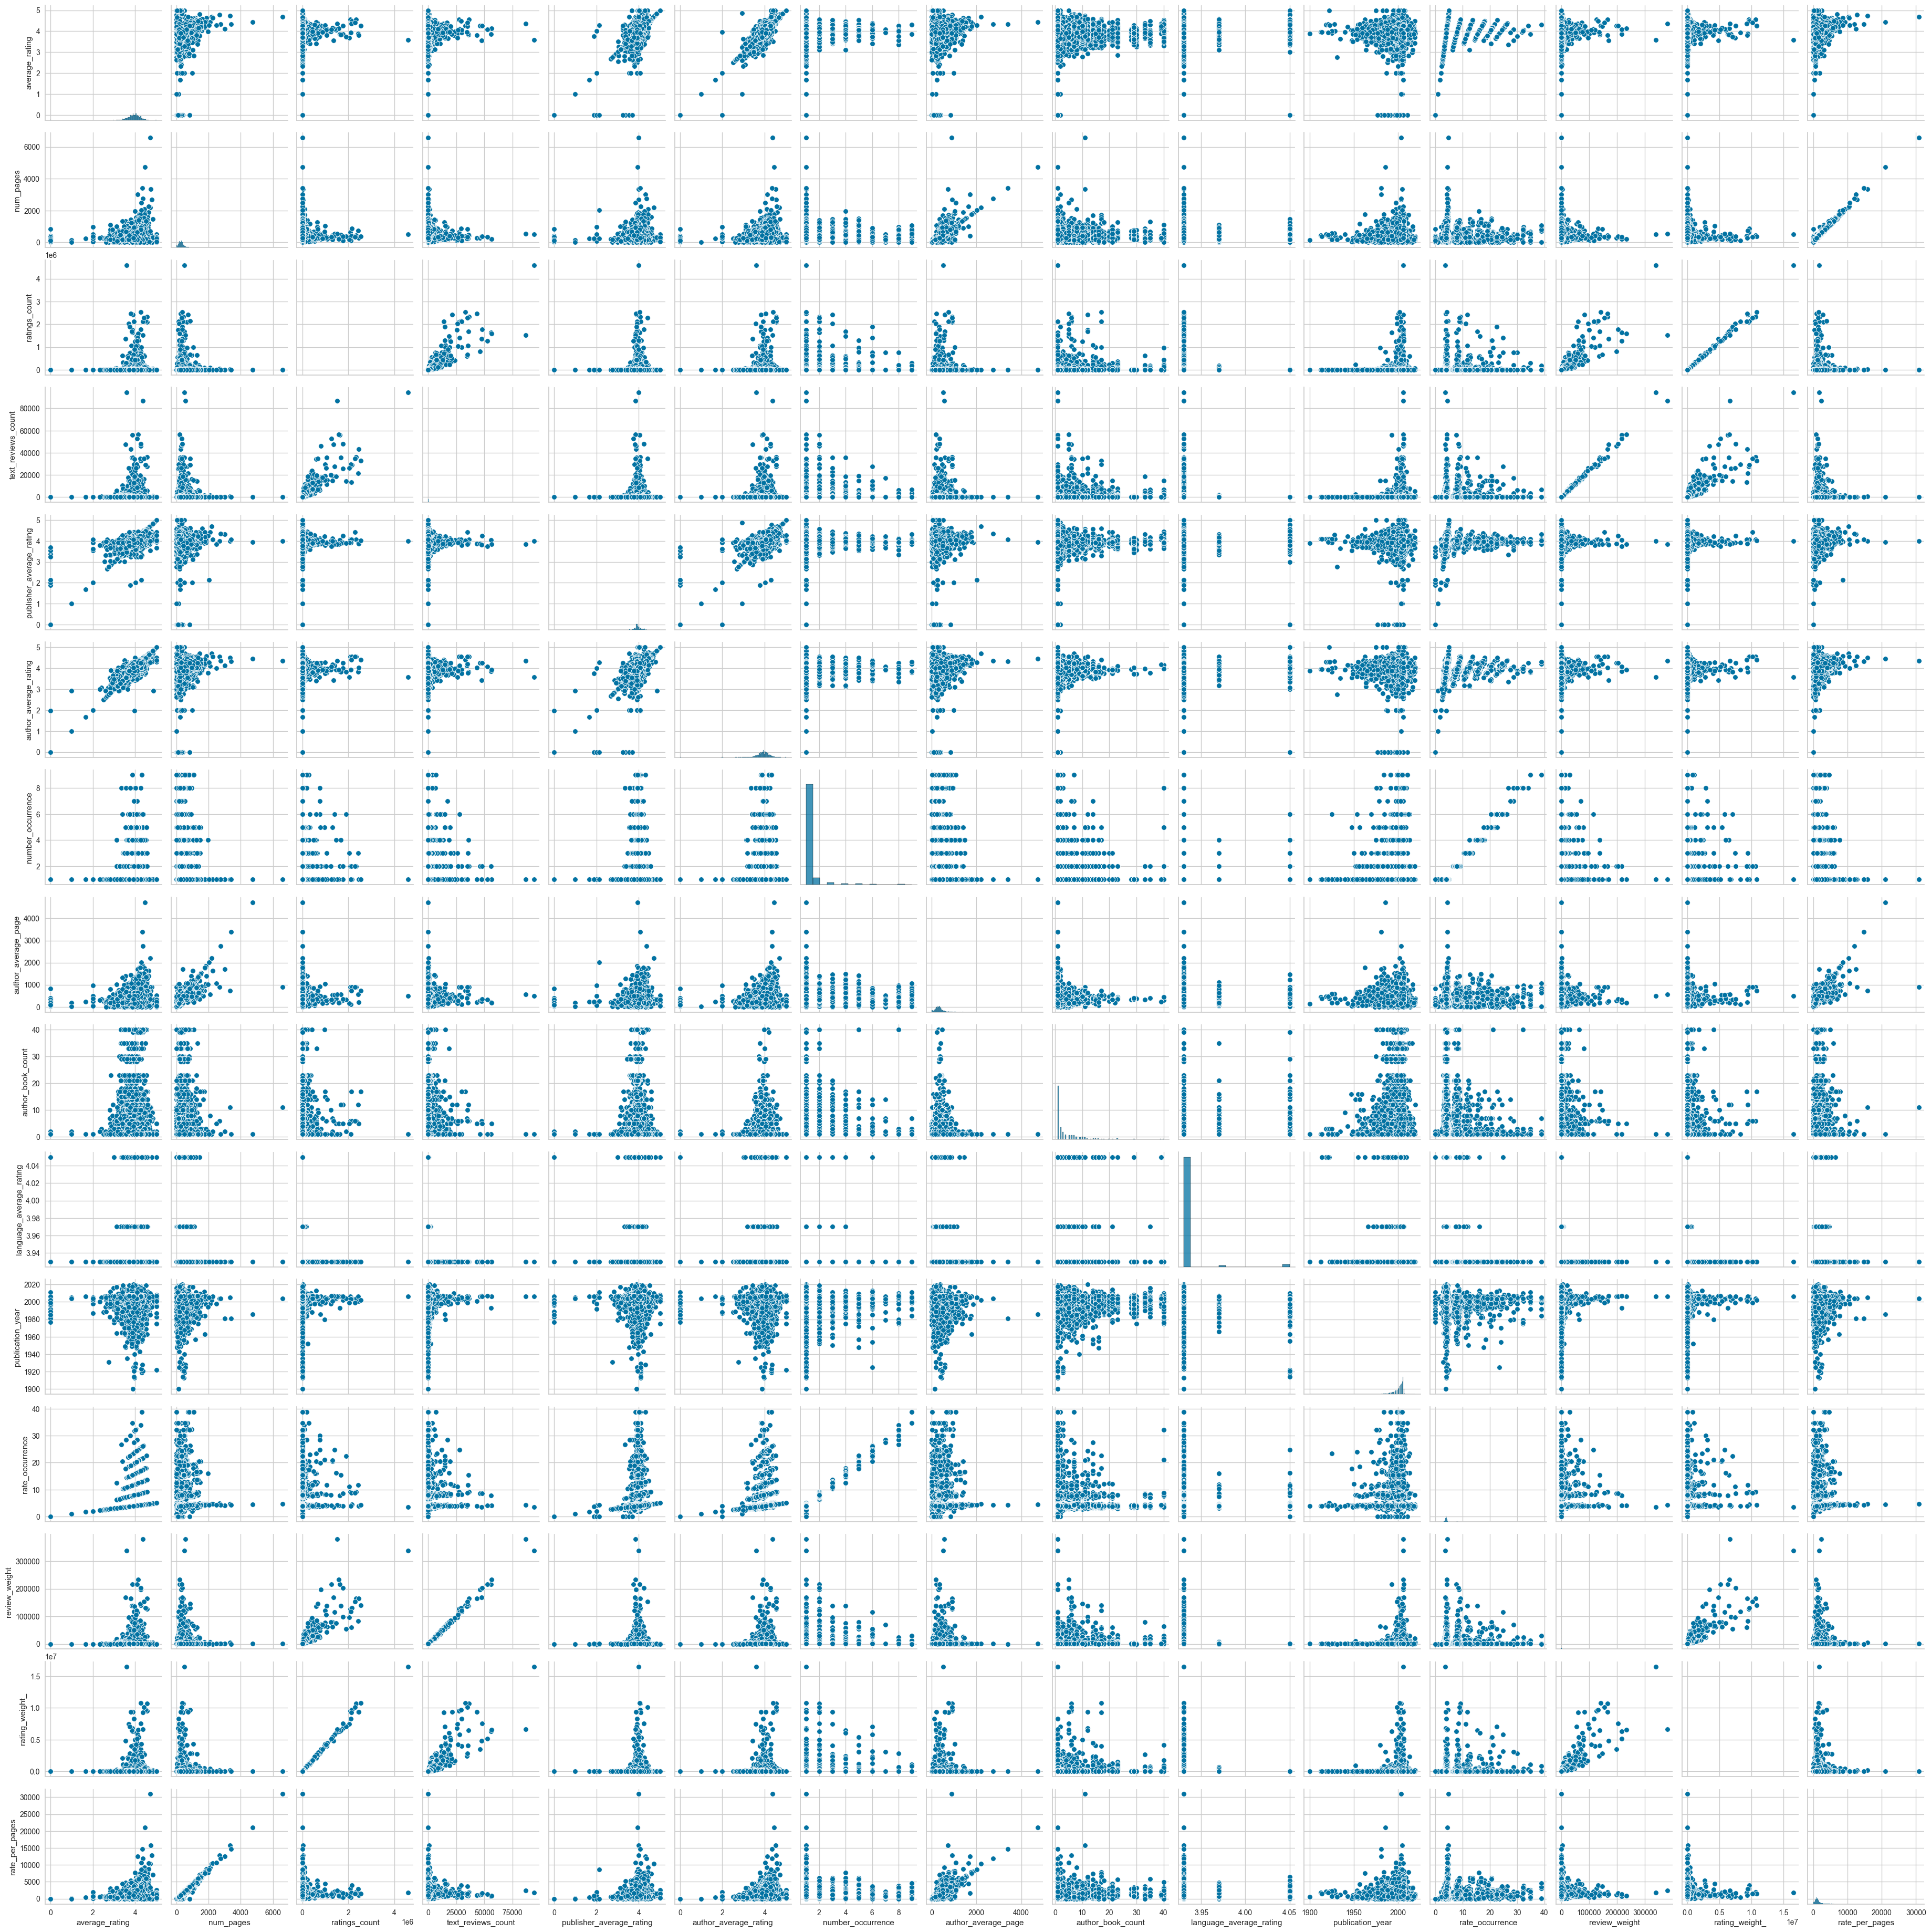

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 0 to 11126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   average_rating            11127 non-null  float64
 1   num_pages                 11127 non-null  int64  
 2   ratings_count             11127 non-null  int64  
 3   text_reviews_count        11127 non-null  int64  
 4   publisher_average_rating  11127 non-null  float64
 5   author_average_rating     11127 non-null  float64
 6   number_occurrence         11127 non-null  int64  
 7   author_average_page       11127 non-null  float64
 8   author_book_count         11127 non-null  int64  
 9   language_average_rating   11127 non-null  float64
 10  publication_year          11127 non-null  float64
 11  rate_occurrence           11127 non-null  float64
 12  review_weight             11127 non-null  float64
 13  rating_weight_            11127 non-null  float64
 14  rate_per_pa

Check the correlations of the variables.

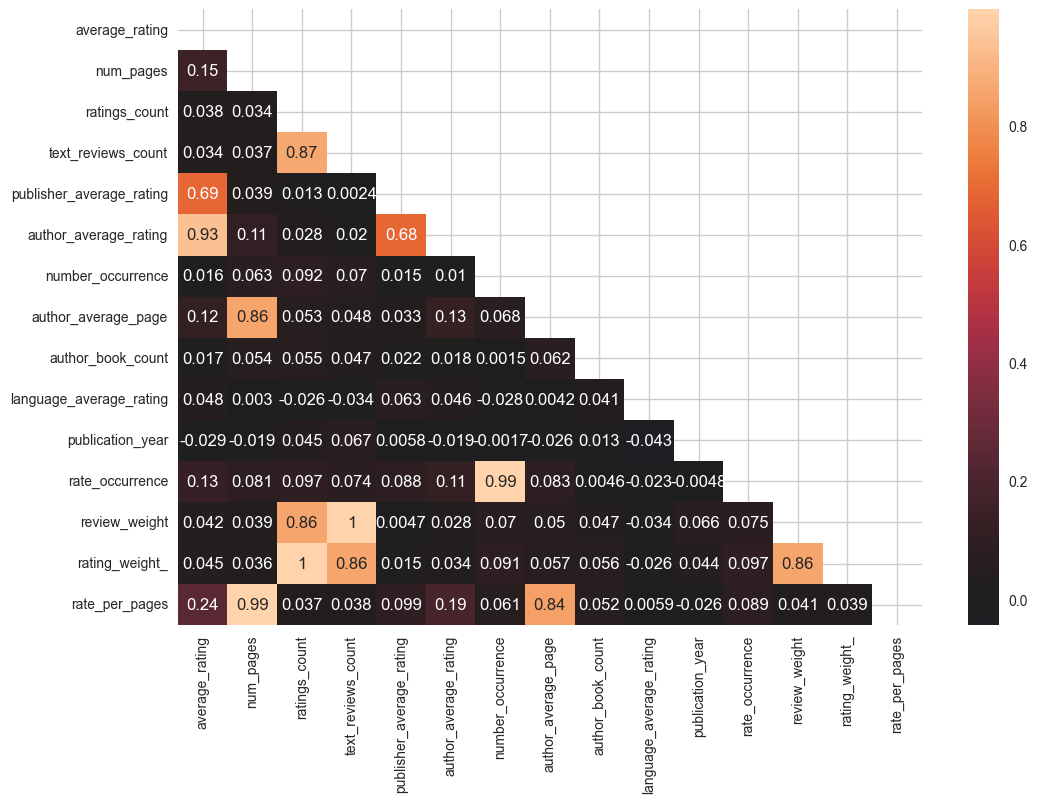

In [9]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8)) 

sns.heatmap(corr, mask=mask, annot=True, center=0)

plt.show()

Model creation.

Separate features and target.

In [10]:
X = df.drop(columns=['average_rating'])
y = df['average_rating']

In [11]:
X

,num_pages,ratings_count,text_reviews_count,publisher_average_rating,author_average_rating,number_occurrence,author_average_page,author_book_count,language_average_rating,publication_year,rate_occurrence,review_weight,rating_weight_,rate_per_pages
0,652,2095690,27591,4.06,4.55,2,902.00,6,3.93,2006.00,9.14,126090.87,9577303.30,2979.64
1,870,2153167,29221,4.06,4.55,1,902.00,6,3.93,2004.00,4.49,131202.29,9667719.83,3906.30
2,352,6333,244,3.98,4.51,2,728.55,11,3.93,2003.00,8.84,1078.48,27991.86,1555.84
3,435,2339585,36325,4.06,4.55,2,902.00,6,3.93,2004.00,9.12,165642.00,10668507.60,1983.60
4,2690,41428,164,3.98,4.55,1,902.00,6,3.93,2004.00,4.78,783.92,198025.84,12858.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,512,156,20,3.97,4.06,1,512.00,1,3.93,2004.00,4.06,81.20,633.36,2078.72
11123,635,783,56,3.92,3.87,1,491.00,5,3.93,1988.00,4.08,228.48,3194.64,2590.80
11124,415,820,95,3.92,3.87,1,491.00,5,3.93,1993.00,3.96,376.20,3247.20,1643.40
11125,434,769,139,3.77,3.87,1,491.00,5,3.93,2007.00,3.72,517.08,2860.68,1614.48


In [12]:
y

0       4.57
1       4.49
2       4.42
3       4.56
4       4.78
        ... 
11122   4.06
11123   4.08
11124   3.96
11125   3.72
11126   3.91
Name: average_rating, Length: 11127, dtype: float64

Feature normalization.

In [13]:
features_to_normalize = ['ratings_count', 'text_reviews_count','num_pages','author_average_page']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specific features
X[features_to_normalize] = scaler.fit_transform(X[features_to_normalize])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#mse_smogn

In [15]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
mae

In [ ]:
r2

In [ ]:
mae

In [ ]:
r2

In [ ]:
X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

models

In [ ]:
best_rf = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# Get feature importances
importance = best_rf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

# Train a Random Forest Regressor
model_smogn = RandomForestRegressor()
model_smogn.fit(X_train, y_train)

# Make predictions
y_pred = model_smogn.predict(X_test)

# Evaluate the model
mse_smogn = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error model smogn: {mse_smogn}')

In [ ]:
# Calculate and print additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_smogn = np.sqrt(mse_smogn)
print(f'\nMean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE):{rmse_smogn}')
print(f'Mean Squared Error (MSE): {mse_smogn}')

In [ ]:
comparison= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': y_test - y_pred})

In [ ]:
comparison

In [ ]:
plt.figure(figsize=(19, 10))
sns.regplot(x=y_pred, y=y_test, marker="+", line_kws={'color':'darkred','alpha':1.0})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Regression Plot of Predicted vs True Values')
plt.show()

LGBMRegressor model

In [ ]:
# Separate features and target
X2 = df.drop(columns=['average_rating'])
y2 = df['average_rating']

# Identify features to normalize
features_to_normalize = ['ratings_count', 'text_reviews_count']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specific features
X2[features_to_normalize] = scaler.fit_transform(X[features_to_normalize])

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [ ]:
# Get feature importances
importance = best_rf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in LGBMRegressor')
plt.show()

# Train a Random Forest Regressor
model_smogn = LGBMRegressor()
model_smogn.fit(X_train, y_train)

# Make predictions
y_pred2 = model_smogn.predict(X_test)



In [ ]:
# Calculate and print additional metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse_smogn = np.sqrt(mse_smogn)
print(f'\nMean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE):{rmse_smogn}')
print(f'Mean Squared Error (MSE): {mse_smogn}')

In [ ]:
comparison= pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2, 'Residual': y_test2 - y_pred2})

In [ ]:
comparison.head()

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(model_smogn)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
plt.figure(figsize=(19, 10))
sns.regplot(x=y_pred2, y=y_test2, marker="+", line_kws={'color':'darkred','alpha':1.0})
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Regression Plot of Predicted vs True Values')
plt.show()

In [ ]:
model = GradientBoostingRegressor()

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Gra = GridSearchCV(model, parameters, refit=True)
grad_Gra.fit(X_train, y_train)

print('Best Score: ', grad_Gra.best_score_*100, '\nBest Parameters: ', grad_Gra.best_params_)

In [ ]:
# Refit the model on the entire training dataset using the best parameters
best_model = GradientBoostingRegressor(learning_rate=grad_Gra.best_params_['learning_rate'],
                                       n_estimators=grad_Gra.best_params_['n_estimators'],
                                       max_depth=4)  # Assuming max_depth was part of the grid search
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

# Feature importance
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.show()


In [ ]:
# Initialize the models
models = {
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'BaggingRegressor': BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=10),
    'LGBMRegressor': LGBMRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    print(f'\n{name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')


In [ ]:
# Train, evaluate, and visualize each model
for name, model in models.items():
    print(f'\n{name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')
    
    # Visualize prediction error
    fig = plt.figure(figsize=(5, 5))
    viz = PredictionError(model)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()


    # Plot feature importance if available
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        features = X_train.columns

        plt.figure(figsize=(10, 6))
        plt.barh(features, feature_importances)
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title(f'Feature Importance in {name}')
        plt.show()
